In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.keras.applications import ResNet50V2

import keras

In [2]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

In [27]:
batch_size = 16
img_height = 180
img_width = 180

data_dir = "Semua"

train_ds = tf.keras.utils.image_dataset_from_directory(
  "Augmented Images",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   "Original Images",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# tes_ds = tf.keras.utils.image_dataset_from_directory(
#   "Fold1/val",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 3192 files belonging to 2 classes.
Using 2554 files for training.
Found 228 files belonging to 2 classes.
Using 45 files for validation.
Found 45 files belonging to 2 classes.
Using 9 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)
class_names = val_ds.class_names
print(class_names)

['Monkey Pox', 'Others']
['Monkey Pox', 'Others']


In [5]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 180, 180, 3)
(16,)


In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(64, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

# base_model = ResNet50V2(
#     include_top=False,
#     input_shape=(256,256,3)
# )

# base_model.trainable = False

# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(256,activation='relu'),
#     BatchNormalization(),
#     Dense(164,activation='relu'),
#     BatchNormalization(),
#     Dense(1,activation='sigmoid')
# ])

In [33]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [34]:
len(tf.config.list_physical_devices('GPU'))

0

In [35]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
160/160 [==============================] - 46s 283ms/step - loss: 0.6956 - accuracy: 0.5767 - val_loss: 0.5707 - val_accuracy: 0.6667
Epoch 2/20
160/160 [==============================] - 44s 274ms/step - loss: 0.6174 - accuracy: 0.6699 - val_loss: 0.5422 - val_accuracy: 0.7556
Epoch 3/20
160/160 [==============================] - 44s 273ms/step - loss: 0.5695 - accuracy: 0.7079 - val_loss: 0.5024 - val_accuracy: 0.7333
Epoch 4/20
160/160 [==============================] - 45s 279ms/step - loss: 0.5753 - accuracy: 0.7177 - val_loss: 0.4176 - val_accuracy: 0.8222
Epoch 5/20
160/160 [==============================] - 44s 276ms/step - loss: 0.4831 - accuracy: 0.7756 - val_loss: 0.4390 - val_accuracy: 0.8222
Epoch 6/20
160/160 [==============================] - 47s 290ms/step - loss: 0.4532 - accuracy: 0.7952 - val_loss: 0.2846 - val_accuracy: 0.9111
Epoch 7/20
160/160 [==============================] - 45s 278ms/step - loss: 0.3584 - accuracy: 0.8473 - val_loss: 0.1568 - val_ac

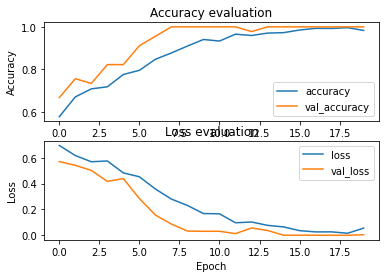

In [36]:
plot_history(history)

In [37]:
print(len(val_ds))

3


In [42]:
model.evaluate(val_ds)
model.save('modelpertama.h5')


3/3 [==============================] - 0s 64ms/step - loss: 0.0046 - accuracy: 1.0000


In [39]:
y_predicted = model.predict(tes_ds)
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

In [40]:
y_predicted_labels

[1, 1, 1, 0, 0, 1, 0, 1, 1]

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 59168)            

In [1]:
# Common 
import os
import keras
import numpy as np 
import tensorflow as tf

# Data
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Data Visualization 
import plotly.express as px

# Models
from keras import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

valid_gen = ImageDataGenerator(rescale=1./255,validation_split=0.4)

test_data = valid_gen.flow_from_directory('Original Images/',target_size=(256,256),shuffle=True,subset='validation',class_mode='binary')


Found 90 images belonging to 2 classes.
